In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
#reading data
invoiceDF = pd.read_csv('Invoices_Train.csv')
paymentsDF = pd.read_csv('Payments_Train.csv')
vendorsDF = pd.read_csv('Vendors.csv')

In [7]:
invoiceDF.head()

,Invoice_ID,Vendor_ID,Invoice_Date,Total_Amount,Currency,Status,Exchange_Rate,Total_Amount_INR
0,INV-00001,VEND-019,2023-01-01,929.46,USD,Paid,82.5,76680.450
1,INV-00002,VEND-008,2023-01-02,621.19,USD,Paid,82.5,51248.175
2,INV-00003,VEND-016,2023-01-03,3375.33,USD,Paid,82.5,278464.725
3,INV-00004,VEND-002,2023-01-04,4188.03,GBP,Paid,102.0,427179.060
4,INV-00005,VEND-004,2023-01-05,3504.20,GBP,Pending,102.0,357428.400


In [9]:
paymentsDF.head()

,Payment_ID,Invoice_ID,Payment_Date,Payment_Amount,Method
0,PAY-00001,INV-00001,2023-01-02,929.46,PayPal
1,PAY-00002,INV-00002,2023-01-03,621.19,Credit Card
2,PAY-00003,INV-00003,2023-01-04,3375.33,PayPal
3,PAY-00004,INV-00004,2023-01-05,4188.03,Credit Card
4,PAY-00005,INV-00006,2023-01-06,3560.70,Credit Card


In [11]:
vendorsDF.head()

,Vendor_ID,Vendor_Name,Country,Category
0,VEND-001,Vendor_1,France,Office Equipment
1,VEND-002,Vendor_2,USA,Consulting
2,VEND-003,Vendor_3,USA,Stationery
3,VEND-004,Vendor_4,UK,Stationery
4,VEND-005,Vendor_5,USA,Consulting


In [27]:
invoiceDF['Invoice_Date'] = pd.to_datetime(invoiceDF['Invoice_Date'])
paymentsDF['Payment_Date'] = pd.to_datetime(paymentsDF['Payment_Date'])

In [29]:
invoiceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Invoice_ID        5000 non-null   object        
 1   Vendor_ID         5000 non-null   object        
 2   Invoice_Date      5000 non-null   datetime64[ns]
 3   Total_Amount      5000 non-null   float64       
 4   Currency          5000 non-null   object        
 5   Status            5000 non-null   object        
 6   Exchange_Rate     5000 non-null   float64       
 7   Total_Amount_INR  5000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 312.6+ KB


/var/folders/b5/7xxf201d4dlgs0txsxw00m8w0000gn/T/ipykernel_10581/597780730.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(invoiceDF['Total_Amount_INR'])


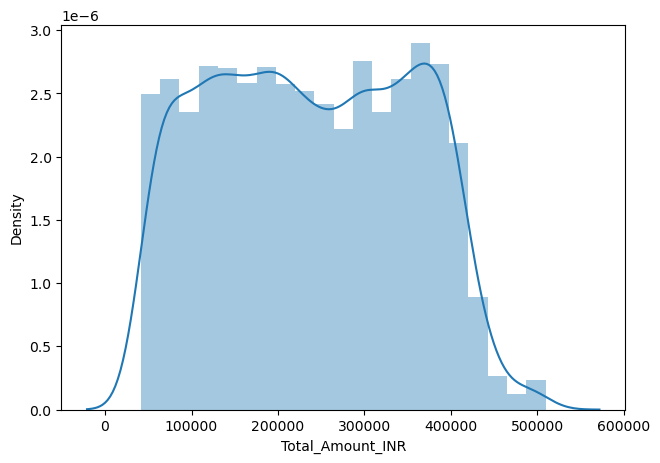

In [37]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(invoiceDF['Total_Amount_INR'])

# sns.distplot(invoiceDF['Invoice_Date'])


plt.show()

As our total amount is not normally distributed!! 

We CAN NOT apply Z-score technique to detect Anomalies in our DATA!

In [43]:
invoiceDF['Total_Amount_INR'].skew()

0.056047122038796485

In [45]:
invoiceDF['Total_Amount_INR'].describe()

count      5000.000000
mean     237350.840717
std      114035.549996
min       41466.975000
25%      139116.881250
50%      233848.160000
75%      336277.972500
max      509342.100000
Name: Total_Amount_INR, dtype: float64

<Axes: ylabel='Total_Amount_INR'>

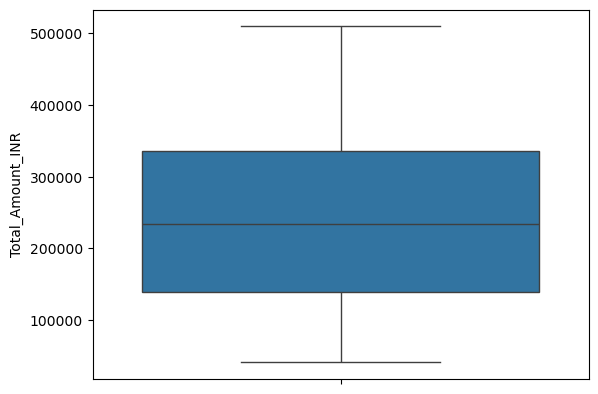

In [47]:
  sns.boxplot(invoiceDF['Total_Amount_INR'])

above graph shows there is no outliers in the data. whole data base is evenly distributed.

still we will perform all the task!

In [49]:
percentile25 = invoiceDF['Total_Amount_INR'].quantile(0.25)
percentile75 = invoiceDF['Total_Amount_INR'].quantile(0.75)
print(percentile25,percentile75)

139116.88125 336277.97250000003


In [51]:
IQR = percentile75-percentile25

In [53]:
IQR

197161.09125000003

In [55]:
upper_limit = percentile75 + 1.5 *  IQR
lower_limit = percentile25 - 1.5 *  IQR

In [57]:
print(upper_limit,lower_limit)

632019.609375 -156624.75562500002


In [59]:
invoiceDF[invoiceDF['Total_Amount_INR']>upper_limit]

,Invoice_ID,Vendor_ID,Invoice_Date,Total_Amount,Currency,Status,Exchange_Rate,Total_Amount_INR


In [63]:
invoiceDF[invoiceDF['Total_Amount_INR']<lower_limit]

,Invoice_ID,Vendor_ID,Invoice_Date,Total_Amount,Currency,Status,Exchange_Rate,Total_Amount_INR


above code proves that there is no outliers.